## **ASTREA - TAKE-HOME EXERCISE FOR DATA SCIENCE**

### **DISCRETE CHOICE MODEL INTERPRETATION & BUSINESS RECOMMENDATIONS**

#### **BY: DAVID GUZZI**  

**MARCH 2025**  

---

### **TASKS**

#### **1. MODEL INTERPRETATION**
- Examine the model coefficients and explain what they indicate about consumer preferences.  
- Identify any potential concerns or inconsistencies in the output (e.g., extreme coefficients, unrealistic substitution patterns).  


In [110]:
# Import necessary libraries.
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import statsmodels.api as sm

In [111]:
# Import model coefficients.
coef_path = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\Python-Projects\astrea\logit_coefficients.csv"
coef = pd.read_csv(coef_path, delimiter=",")
coef

,Variable,Coefficient
0,const,-3.289498
1,price,-0.584335
2,brand_strength,0.310713
3,quality_score,1.200612


**To achieve a proper understanding of the available coefficients, a brief inspection of the dataset is performed.**

In [112]:
respondents_data_path = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\Python-Projects\astrea\synthetic_choice_data.csv"
respondents_data = pd.read_csv(respondents_data_path, delimiter=",")
respondents_data.head()

,respondent_id,trip_id,product_id,price,brand_strength,quality_score,group,choice
0,0,0,13,2.911052,0.948886,4.579309,0,0
1,0,0,5,2.403951,0.785176,3.650089,0,0
2,0,0,7,8.795585,0.514234,3.080272,0,0
3,0,0,10,1.185260,0.607545,4.878339,0,1
4,0,0,12,8.491984,0.065052,4.757996,0,0


In [113]:
respondents_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   respondent_id   75000 non-null  int64  
 1   trip_id         75000 non-null  int64  
 2   product_id      75000 non-null  int64  
 3   price           75000 non-null  float64
 4   brand_strength  75000 non-null  float64
 5   quality_score   75000 non-null  float64
 6   group           75000 non-null  int64  
 7   choice          75000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.6 MB


In [114]:
respondents_data[respondents_data.duplicated()]

,respondent_id,trip_id,product_id,price,brand_strength,quality_score,group,choice


In [115]:
for i in ['respondent_id', 'trip_id', 'product_id', 'group', 'choice']:
    print(f"\nColumn: {i}")
    print(f"Total unique: {respondents_data[i].nunique()}")
    print(f"Unique values: {respondents_data[i].unique()}")
    print("-" * 100)


Column: respondent_id
Total unique: 1500
Unique values: [   0    1    2 ... 1497 1498 1499]
----------------------------------------------------------------------------------------------------

Column: trip_id
Total unique: 10
Unique values: [0 1 2 3 4 5 6 7 8 9]
----------------------------------------------------------------------------------------------------

Column: product_id
Total unique: 20
Unique values: [13  5  7 10 12  0  3  1 19 15 18  9 17 14 16  8  2 11  6  4]
----------------------------------------------------------------------------------------------------

Column: group
Total unique: 2
Unique values: [0 1]
----------------------------------------------------------------------------------------------------

Column: choice
Total unique: 2
Unique values: [0 1]
----------------------------------------------------------------------------------------------------


In [116]:
respondent_stats = respondents_data.groupby('respondent_id')['trip_id'].nunique().reset_index()
respondent_stats['total_observations'] = respondents_data.groupby('respondent_id').size().values

print("\nUnique values for total observations per respondent:")
print("-" * 100)
print(respondent_stats['total_observations'].unique())

print("\nUnique values for unique trips per respondent:")
print("-" * 100)
print(respondent_stats['trip_id'].unique())


Unique values for total observations per respondent:
----------------------------------------------------------------------------------------------------
[50]

Unique values for unique trips per respondent:
----------------------------------------------------------------------------------------------------
[10]


In [117]:
total_respondents = respondents_data['respondent_id'].nunique()
group_0_respondents = respondents_data[respondents_data["group"] == 0]['respondent_id'].nunique()
group_1_respondents = respondents_data[respondents_data["group"] == 1]['respondent_id'].nunique()

print(f"\nTotal unique respondents: {total_respondents}")
print("-" * 100)
print(f"Unique respondents in Group 0: {group_0_respondents}")
print(f"Unique respondents in Group 1: {group_1_respondents}")


Total unique respondents: 1500
----------------------------------------------------------------------------------------------------
Unique respondents in Group 0: 738
Unique respondents in Group 1: 762


In [118]:
respondents_data[respondents_data["respondent_id"] == 0].sort_values(by='trip_id')

,respondent_id,trip_id,product_id,price,brand_strength,quality_score,group,choice
0,0,0,13,2.911052,0.948886,4.579309,0,0
1,0,0,5,2.403951,0.785176,3.650089,0,0
2,0,0,7,8.795585,0.514234,3.080272,0,0
3,0,0,10,1.185260,0.607545,4.878339,0,1
4,0,0,12,8.491984,0.065052,4.757996,0,0
5,0,1,0,4.370861,0.611853,1.488153,0,0
6,0,1,3,6.387926,0.366362,4.637282,0,0
7,0,1,5,2.403951,0.785176,3.650089,0,0
8,0,1,13,2.911052,0.948886,4.579309,0,1
9,0,1,7,8.795585,0.514234,3.080272,0,0


In [119]:
respondents_data[respondents_data["respondent_id"] == 2].sort_values(by='trip_id')

,respondent_id,trip_id,product_id,price,brand_strength,quality_score,group,choice
100,2,0,17,5.722808,0.097672,1.783931,1,0
101,2,0,3,6.387926,0.366362,4.637282,1,0
102,2,0,12,8.491984,0.065052,4.757996,1,0
103,2,0,15,2.650641,0.808397,4.687497,1,1
104,2,0,5,2.403951,0.785176,3.650089,1,0
105,2,1,9,7.372653,0.046450,1.739418,1,0
106,2,1,0,4.370861,0.611853,1.488153,1,0
107,2,1,19,3.621062,0.440152,2.301321,1,0
108,2,1,2,7.587945,0.292145,1.137554,1,0
109,2,1,3,6.387926,0.366362,4.637282,1,1


<div class="admonition tip alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Dataset Overview</p>
<p class="last">
From the dataset observation, the following points can be noted:

- The dataset contains 8 columns:  
  i) <strong>respondent_id</strong> (survey respondent),  
  ii) <strong>trip_id</strong> (subsets of items),  
  iii) <strong>product_id</strong> (item),  
  iv) <strong>price</strong>,  
  v) <strong>brand_strength</strong>,  
  vi) <strong>quality_score</strong>,  
  vii) <strong>group</strong>,  
  viii) <strong>choice</strong> (purchase decision for an item within trip_id).

- The dataset has <strong>75,000 observations</strong> with correctly formatted columns, no missing data, and no duplicate records. 

- The survey was conducted on <strong>1,500 respondents</strong>, each required to choose <strong>10 product_id</strong>. Since only one product_id must be selected per trip_id (as choice is a binary variable) and each respondent has <strong>10 unique trip_id</strong>, the <strong>total number of records per respondent is 50</strong>.

- Since <strong>choice is a binary variable</strong>, under this scenario, there would be <strong>no difference</strong> between the results (coefficients) produced by a Logit model and an MNL Logit model. 
    
- There are <strong>2 groups</strong>:  
  - <strong>Group 0:</strong> 738 respondents.  
  - <strong>Group 1:</strong> 762 respondents.
</p>
</div>

**Finally, before interpreting the coefficients, an attempt is made to generate them using the provided dataset and the statsmodels library.**

In [120]:
x = respondents_data[['price', 'brand_strength', 'quality_score']]
y = respondents_data['choice']

X = sm.add_constant(x)

model = sm.MNLogit(y, X)
results = model.fit()
coefs = pd.DataFrame(results.params).reset_index()
coefs.columns = ['variable', 'coefficient']
coefs

Optimization terminated successfully.
         Current function value: 0.276433
         Iterations 8


,variable,coefficient
0,const,-3.289498
1,price,-0.584335
2,brand_strength,0.310713
3,quality_score,1.200612


The confirmation of the coefficient calculation method, along with the previous exploratory analysis, allows us to make more appropriate comments regarding the obtained coefficients. Before proceeding, we analytically specify the model used.  

This model enables us to measure the effect of a change in the explanatory variable $x_i$ on the probability of the analyzed event occurring. This effect arises from the derivative of $Pr[yᵢ = j \mid .]$ with respect to $x_i$:  

$\frac{\partial Pr[yᵢ = j \mid .]}{\partial xᵢ} = Pr[yᵢ = j \mid .] \left\{ \alpha_j - \sum_{l=1}^{J-1} \alpha_l Pr[yᵢ = l \mid .] \right\}$

The sign of this derivative depends not only on the sign of the coefficient associated with $x_i$ but also on the sign of the term within the brackets. Therefore, the coefficients of the MNL Logit model are not directly interpretable, as they represent the impact of each variable on the log-odds of the event occurring.

One way to interpret these coefficients is by calculating the average marginal effects, which show the change in probability—evaluated at the mean values of the covariates—for a one-unit change in each explanatory variable, holding others constant. We proceed to compute them next.

In [121]:
margins = results.get_margeff(at='mean')
margins.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
       MNLogit Marginal Effects      
=====================================
Dep. Variable:                 choice
Method:                          dydx
At:                              mean
==================================================================================
      choice=0      dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
price              0.0380      0.001     70.298      0.000       0.037       0.039
brand_strength    -0.0202      0.004     -5.560      0.000      -0.027      -0.013
quality_score     -0.0781      0.001    -67.903      0.000      -0.080      -0.076
----------------------------------------------------------------------------------
      choice=1      dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
price             -0.0380      0.001    -70.298      0.000      -0.039      -0.037
brand_strength     0.0202      0.004      5.560      0.000       0.013       0.027
quality_score      0.0781      0.001     67.903      0.000       0.076       0.080
==================================================================================
"""

<div class="admonition tip alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Coefficients interpretation</p>
<p class="last">

In this context, we can interpret the marginal effects as follows:

- **Price** (-0.0380): A higher price decreases the probability of a product being chosen. Specifically, a one-unit increase in price reduces the probability of choice by 3.80 percentage points, on average.

- **Brand Strength** (0.0202): A stronger brand increases the probability of selection. A one-unit increase in brand strength raises the probability of choice by 2.02 percentage points, on average.

- **Quality Score** (0.0781): A higher quality perception significantly increases the likelihood of selection. A one-unit increase in quality score leads to a 7.81 percentage point rise in the probability of choice.

Overall, consumers prefer lower prices, stronger brands, and higher perceived quality when making their purchasing decisions.
</p>
</div>

Finally, using the estimated coefficients, the **choice probabilities for each product_id** are calculated **for every represent_id and trip_id** in the analyzed dataset.

In [122]:
respondents_data["const"] = 1.0

# Compute utility scores.
utilities = (
respondents_data["const"] * coefs['coefficient'][0] +
respondents_data["price"] * coefs['coefficient'][1] +
respondents_data["brand_strength"] * coefs['coefficient'][2] +
respondents_data["quality_score"] * coefs['coefficient'][3]
)

# Apply softmax transformation within each respondent-trip group.
respondents_data["exp_utilities"] = np.exp(utilities)
respondents_data["predicted_choice_prob"] = respondents_data.groupby(["respondent_id", "trip_id"])["exp_utilities"].transform(lambda x: x / x.sum())
respondents_data.head()

,respondent_id,trip_id,product_id,price,brand_strength,quality_score,group,choice,const,exp_utilities,predicted_choice_prob
0,0,0,13,2.911052,0.948886,4.579309,0,0,1.0,2.230619,0.200402
1,0,0,5,2.403951,0.785176,3.650089,0,0,1.0,0.934350,0.083943
2,0,0,7,8.795585,0.514234,3.080272,0,0,1.0,0.010347,0.000930
3,0,0,10,1.185260,0.607545,4.878339,0,1,1.0,7.874885,0.707489
4,0,0,12,8.491984,0.065052,4.757996,0,0,1.0,0.080545,0.007236


In general, we should expect that for records with `choice = 1`, the probability of selection should be high (possibly the highest within each `trip_id`). This can be summarized in the following chart:

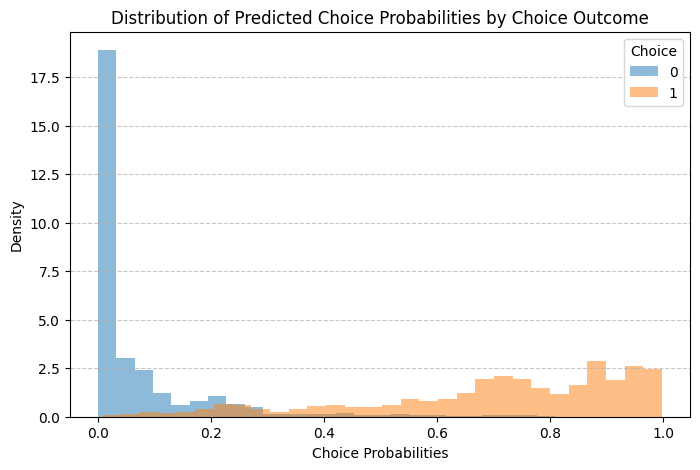

In [123]:
plt.figure(figsize=(8, 5))
respondents_data.groupby("choice")["predicted_choice_prob"].plot.hist(
    alpha=0.5, bins=30, legend=True, density=True
)
plt.xlabel("Choice Probabilities")
plt.ylabel("Density")
plt.title("Distribution of Predicted Choice Probabilities by Choice Outcome")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Choice")
plt.show()

Analyzing the dataset output, we can observe that cases with low selection probability when `choice = 1` are mainly due to the presence of products within the same `trip_id` that have higher values of `brand_strength` and `quality_score` or lower `price`. This impacts the probability calculation. The following is an example:

In [124]:
respondents_data[(respondents_data['respondent_id'] == 1) & (respondents_data['trip_id'] == 7)].sort_values(by='trip_id')

,respondent_id,trip_id,product_id,price,brand_strength,quality_score,group,choice,const,exp_utilities,predicted_choice_prob
85,1,7,0,4.370861,0.611853,1.488153,0,0,1.0,0.020926,0.163488
86,1,7,18,4.887505,0.684233,1.180909,0,1,1.0,0.010943,0.085495
87,1,7,12,8.491984,0.065052,4.757996,0,0,1.0,0.080545,0.629254
88,1,7,7,8.795585,0.514234,3.080272,0,0,1.0,0.010347,0.080834
89,1,7,1,9.556429,0.139494,2.980708,0,0,1.0,0.005239,0.040929


This leads to the idea of model goodness-of-fit. We can compare the highest `predicted_choice_prob` value for each `respondent_id` and `trip_id` and verify whether it corresponds to `choice = 1`. The ratio of correctly predicted choices to the total possible choices provides an accuracy measure, as follows:

In [125]:
df_max_prob = respondents_data.loc[respondents_data.groupby(['respondent_id', 'trip_id'])['predicted_choice_prob'].idxmax()]
df_max_prob['correct_prediction'] = df_max_prob['choice'] == 1
accuracy = df_max_prob['correct_prediction'].mean()

print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8543


Let's look at an example. For `respondent_id = 0`, the model predicts "incorrectly" only once.

In [126]:
df_max_prob[df_max_prob['respondent_id'] == 0]

,respondent_id,trip_id,product_id,price,brand_strength,quality_score,group,choice,const,exp_utilities,predicted_choice_prob,correct_prediction
3,0,0,10,1.185260,0.607545,4.878339,0,1,1.0,7.874885,0.707489,True
8,0,1,13,2.911052,0.948886,4.579309,0,1,1.0,2.230619,0.645082,True
14,0,2,15,2.650641,0.808397,4.687497,0,1,1.0,2.831159,0.937628,True
18,0,3,14,2.636425,0.965632,3.391600,0,1,1.0,0.632534,0.926702,True
24,0,4,15,2.650641,0.808397,4.687497,0,0,1.0,2.831159,0.492634,False
25,0,5,10,1.185260,0.607545,4.878339,0,1,1.0,7.874885,0.990088,True
31,0,6,10,1.185260,0.607545,4.878339,0,1,1.0,7.874885,0.775081,True
38,0,7,14,2.636425,0.965632,3.391600,0,1,1.0,0.632534,0.746465,True
43,0,8,14,2.636425,0.965632,3.391600,0,1,1.0,0.632534,0.912623,True
47,0,9,6,1.522753,0.199674,2.246844,0,1,1.0,0.241795,0.864070,True


#### **2. BUSINESS IMPLICATIONS**
- Suppose our client is considering discontinuing Product X (choose any item). Based on the model results, where do you expect its sales volume to shift?  
- What additional analyses or model enhancements would you recommend to improve sourcing predictions? 

In order to analyze the effect of discontinuing a specific product (in this case, `product_id = 7`), the change in sales volume direction will be examined as follows.

In [127]:
respondents_data_new = respondents_data.copy()

product_to_remove = 7
respondents_data_new = respondents_data_new[respondents_data_new['product_id'] != product_to_remove]
respondents_data_new['predicted_choice_prob_new'] = respondents_data_new.groupby(['respondent_id', 'trip_id'])['exp_utilities'].transform(lambda x: x / x.sum())
respondents_data_new.head()

,respondent_id,trip_id,product_id,price,brand_strength,quality_score,group,choice,const,exp_utilities,predicted_choice_prob,predicted_choice_prob_new
0,0,0,13,2.911052,0.948886,4.579309,0,0,1.0,2.230619,0.200402,0.200588
1,0,0,5,2.403951,0.785176,3.650089,0,0,1.0,0.934350,0.083943,0.084021
3,0,0,10,1.185260,0.607545,4.878339,0,1,1.0,7.874885,0.707489,0.708148
4,0,0,12,8.491984,0.065052,4.757996,0,0,1.0,0.080545,0.007236,0.007243
5,0,1,0,4.370861,0.611853,1.488153,0,0,1.0,0.020926,0.006052,0.006070


In [128]:
comparison_df = respondents_data.merge(
    respondents_data_new[['respondent_id', 'trip_id', 'product_id', 'predicted_choice_prob_new']],
    on=['respondent_id', 'trip_id', 'product_id'],
    how='left'
)

stats_comparison = comparison_df.groupby('product_id')[['predicted_choice_prob', 'predicted_choice_prob_new']].mean().reset_index()
stats_comparison['change'] = stats_comparison['predicted_choice_prob'] - stats_comparison['predicted_choice_prob_new']
stats_comparison.sort_values(by='change', ascending=True, inplace=True)
stats_comparison.reset_index(drop=True, inplace=True)
stats_comparison

,product_id,predicted_choice_prob,predicted_choice_prob_new,change
0,19,0.109509,0.111208,-0.001700
1,12,0.108146,0.109819,-0.001674
2,4,0.142763,0.144358,-0.001594
3,8,0.071948,0.073500,-0.001551
4,3,0.240321,0.241833,-0.001512
5,6,0.220194,0.221572,-0.001378
6,16,0.038757,0.039902,-0.001145
7,0,0.034759,0.035814,-0.001055
8,14,0.368372,0.369334,-0.000961
9,11,0.029532,0.030397,-0.000865


<div class="admonition tip alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Impact of product discontinuation</p>
<p class="last">

If **product_id = 7** is discontinued, and the **estimated choice probabilities are redistributed for each respondent_id and trip_id combination**, the product_ids that receive the highest redistribution appear in the previous table, with product_id = 19 benefiting the most, followed by product_id = 12, and so on.

However, this analysis relies on a **key assumption of the MNL Logit model**: the Independence of Irrelevant Alternatives (IIA) property, which states that the probability ratio between two options remains unchanged when a third option is modified. This assumption may be unrealistic, given the data and the actual (and unknown) substitution patterns between products.

</p>
</div>

#### **3. TECHNICAL RECOMMENDATIONS**
- What limitations does a standard MNL model have in answering sourcing questions?  
- Suggest a potential improvement.  

<div class="admonition tip alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Final thoughts</p>
<p class="last">

The MNL model has key limitations in sourcing analysis due to the Independence of Irrelevant Alternatives (IIA) assumption, which prevents it from capturing differentiated substitution patterns. When a product is removed, demand is redistributed proportionally, without distinguishing between close and distant substitutes. Additionally, it assumes preference homogeneity, meaning all consumers respond similarly to changes in price and quality. To improve prediction accuracy, Machine Learning models like Random Forest or XGBoost can be leveraged to capture nonlinear relationships and interaction effects. Furthermore, enriching the model with additional features, such as seasonality, supplier reliability, and macroeconomic indicators (e.g., inflation, exchange rates), can better reflect real market dynamics.

</p>
</div>